# Analysis
In this notebook that analysis is done. 

Things that are done in this section:
- Implement functions that exctract information from the .dat files
   - The header
   - The contribution summary
   - The contribution per generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis import *

In [2]:
#testFile = "TestSimulation.dat"
testFile = "figure2_100000_4_2_100_RandomRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"

Detail TestSimulation:

    generations = 10000
    numberOfGames = 1000
    numberOfRounds = 4
    groupSize = 2
    popSize = 100

    alphaPoor = 0.8
    alphaRich = 0.8
    wealthPoor = 1
    wealthRich = 1
    typeOfRiskCurve = RiskCurve.Linear

    heterogeneous = False

Detail TestHeteroSimulation:

    generations = 10000
    numberOfGames = 1000
    numberOfRounds = 4
    groupSize = 2
    popSize = 100

    alphaPoor = 0.8
    alphaRich = 0.5
    wealthPoor = 1
    wealthRich = 4
    typeOfRiskCurve = RiskCurve.Linear

    heterogeneous = True
    

## Reading the file

### ReadingHeader

In [3]:
header = readHeader(filename = testFile)
header

{'nr_generations': 100000.0,
 'number_of_rounds': 4.0,
 'group_size': 2.0,
 'population_size': 100.0,
 'risk_in_round': 'RandomRound',
 'alpha_poor': 1.0,
 'alpha_rich': 1.0,
 'number_of_games': 1000.0,
 'wealth_poor': 1.0,
 'wealth_rich': 1.0,
 'type_of_risk_curve': 'StepWiseLinear',
 'heterogenous': 0.0,
 'lambda_value': 7.0}

### Reading the contribution 

In [4]:
ContributionArray = readContributionFileToData(fileName = testFile, heterogeneous = header["heterogenous"], rounds = int(header["number_of_rounds"]))
ContributionArray.shape

(100000, 4)

/Users/bogdanvlad/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/bogdanvlad/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


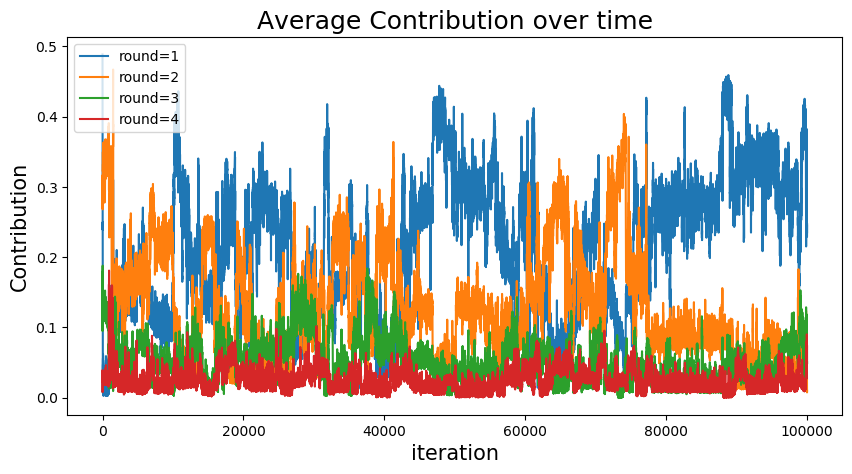

In [5]:
fig = plotContributionVsGeneration(ContributionArray)

### Reading summary

In [6]:
summary = readSummary(filename=testFile,heterogeneous=header["heterogenous"])
summary

{'AverageContribution': 0.413855,
 'AverageContributionPerRoundRich': array([0.217031, 0.125613, 0.048444, 0.022755])}

-------
Things to further do:
- Combine the information of multiple simulations in one plot
- Make plots of the paper.

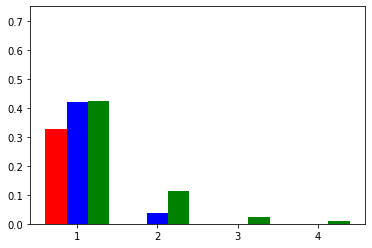

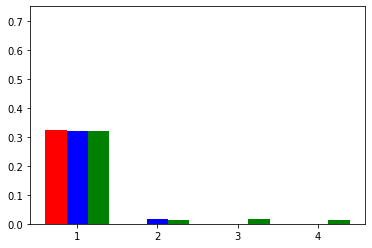

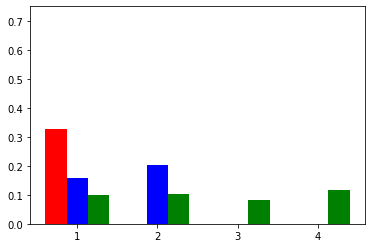

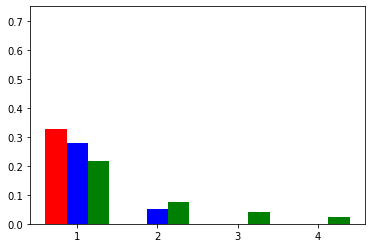

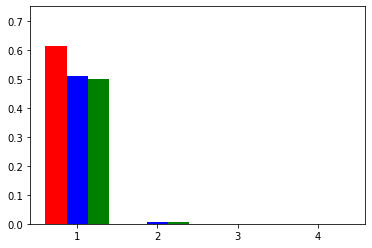

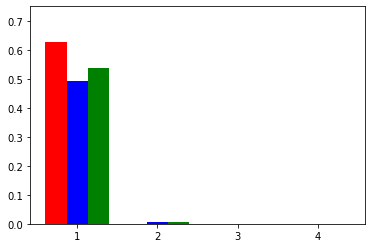

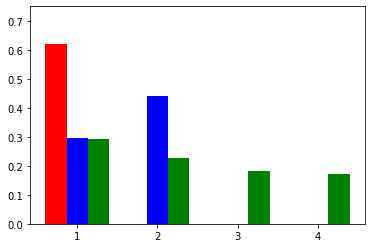

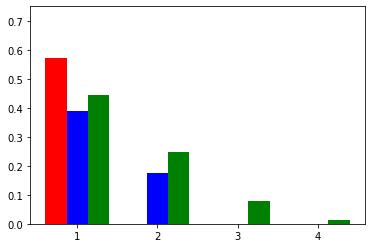

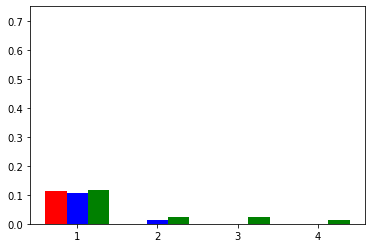

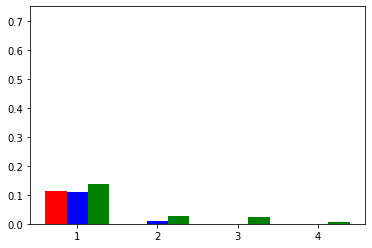

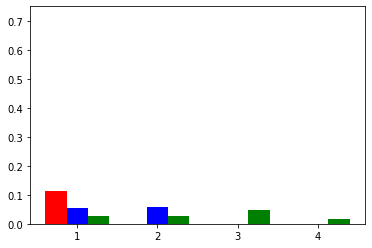

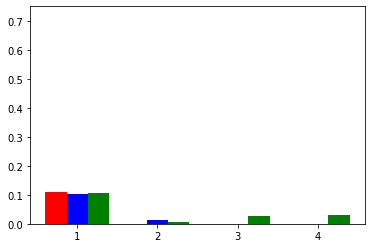

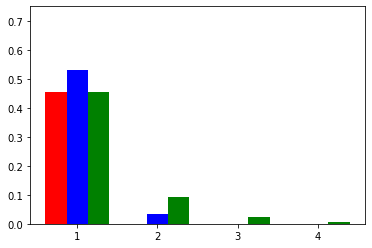

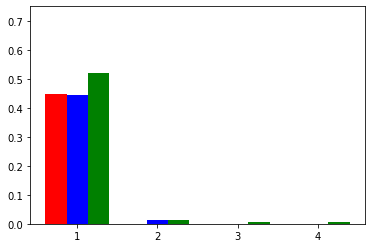

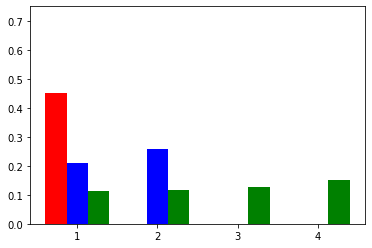

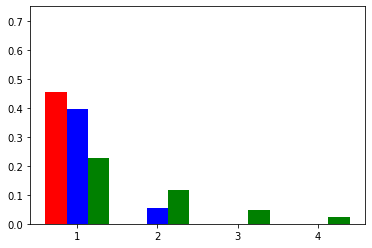

In [7]:
# reference: https://stackoverflow.com/questions/48157735/plot-multiple-bars-for-categorical-data
def subcategorybar(X, vals, colors, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge", color=colors[i])   
    plt.xticks(_X, X)
    
def plot(filename_1round, filename_2round, filename_4round, stabilityPoint):
    result_plot1 = readContributionFileToData(filename_1round, 0, 1, 100000)
    result_plot2 = readContributionFileToData(filename_2round, 0, 2, 100000)
    result_plot4 = readContributionFileToData(filename_4round, 0, 4, 100000)

    x1 = [(np.average(result_plot1[stabilityPoint:])), 0, 0, 0]
    x2 = [np.average(result_plot2[stabilityPoint:,0]), np.average(result_plot2[stabilityPoint:,1]), 0, 0]
    x3 = [np.average(result_plot4[stabilityPoint:,0]), np.average(result_plot4[stabilityPoint:,1]), np.average(result_plot4[stabilityPoint:,2]), np.average(result_plot4[stabilityPoint:,3])]
    
    subcategorybar([1, 2, 3, 4], [x1, x2, x3], ["red", "blue", "green"])

    plt.ylim(top=0.75) #ymax is your value
    plt.ylim(bottom=0)
    plt.show()

# --- Plot 1

figure2_plot1_1 = "figure2_100000_1_2_100_EveryRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat"
figure2_plot1_2 = "figure2_100000_2_2_100_EveryRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat"
figure2_plot1_4 = "figure2_100000_4_2_100_EveryRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat"

plot(figure2_plot1_1, figure2_plot1_2, figure2_plot1_4, 10000)

# -- Plot 2

figure2_plot2_1 = "figure2_100000_1_2_100_FirstRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat"
figure2_plot2_2 = "figure2_100000_2_2_100_FirstRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat"
figure2_plot2_4 = "figure2_100000_4_2_100_FirstRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat"

plot(figure2_plot2_1, figure2_plot2_2, figure2_plot2_4, 10000)

# --- Plot 3

figure2_plot3_1 = "figure2_100000_1_2_100_LastRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat"
figure2_plot3_2 = "figure2_100000_2_2_100_LastRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat"
figure2_plot3_4 = "figure2_100000_4_2_100_LastRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat"

plot(figure2_plot3_1, figure2_plot3_2, figure2_plot3_4, 5000)

# --- Plot 4

figure2_plot4_1 = "figure2_100000_1_2_100_RandomRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat"
figure2_plot4_2 = "figure2_100000_2_2_100_RandomRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat"
figure2_plot4_4 = "figure2_100000_4_2_100_RandomRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat"

plot(figure2_plot4_1, figure2_plot4_2, figure2_plot4_4, 10000)

# --- Plot 5

figure2_plot5_1 = "figure2_100000_1_2_100_EveryRound_1.00_1.00_1000_1_1_PowerFunction_0_10.00.dat"
figure2_plot5_2 = "figure2_100000_2_2_100_EveryRound_1.00_1.00_1000_1_1_PowerFunction_0_10.00.dat"
figure2_plot5_4 = "figure2_100000_4_2_100_EveryRound_1.00_1.00_1000_1_1_PowerFunction_0_10.00.dat"

plot(figure2_plot5_1, figure2_plot5_2, figure2_plot5_4, 10000)

# --- Plot 6

figure2_plot6_1 = "figure2_100000_1_2_100_FirstRound_1.00_1.00_1000_1_1_PowerFunction_0_10.00.dat"
figure2_plot6_2 = "figure2_100000_2_2_100_FirstRound_1.00_1.00_1000_1_1_PowerFunction_0_10.00.dat"
figure2_plot6_4 = "figure2_100000_4_2_100_FirstRound_1.00_1.00_1000_1_1_PowerFunction_0_10.00.dat"

plot(figure2_plot6_1, figure2_plot6_2, figure2_plot6_4, 10000)

# --- Plot 7

figure2_plot7_1 = "figure2_100000_1_2_100_LastRound_1.00_1.00_1000_1_1_PowerFunction_0_10.00.dat"
figure2_plot7_2 = "figure2_100000_2_2_100_LastRound_1.00_1.00_1000_1_1_PowerFunction_0_10.00.dat"
figure2_plot7_4 = "figure2_100000_4_2_100_LastRound_1.00_1.00_1000_1_1_PowerFunction_0_10.00.dat"

plot(figure2_plot7_1, figure2_plot7_2, figure2_plot7_4, 10000)

# --- Plot 8

figure2_plot8_1 = "figure2_100000_1_2_100_RandomRound_1.00_1.00_1000_1_1_PowerFunction_0_10.00.dat"
figure2_plot8_2 = "figure2_100000_2_2_100_RandomRound_1.00_1.00_1000_1_1_PowerFunction_0_10.00.dat"
figure2_plot8_4 = "figure2_100000_4_2_100_RandomRound_1.00_1.00_1000_1_1_PowerFunction_0_10.00.dat"

plot(figure2_plot8_1, figure2_plot8_2, figure2_plot8_4, 10000)

# --- Plot 9

figure2_plot9_1 = "figure2_100000_1_2_100_EveryRound_1.00_1.00_1000_1_1_Linear_0_10.00.dat"
figure2_plot9_2 = "figure2_100000_2_2_100_EveryRound_1.00_1.00_1000_1_1_Linear_0_10.00.dat"
figure2_plot9_4 = "figure2_100000_4_2_100_EveryRound_1.00_1.00_1000_1_1_Linear_0_10.00.dat"

plot(figure2_plot9_1, figure2_plot9_2, figure2_plot9_4, 5000)

# --- Plot 10

figure2_plot10_1 = "figure2_100000_1_2_100_FirstRound_1.00_1.00_1000_1_1_Linear_0_10.00.dat"
figure2_plot10_2 = "figure2_100000_2_2_100_FirstRound_1.00_1.00_1000_1_1_Linear_0_10.00.dat"
figure2_plot10_4 = "figure2_100000_4_2_100_FirstRound_1.00_1.00_1000_1_1_Linear_0_10.00.dat"

plot(figure2_plot10_1, figure2_plot10_2, figure2_plot10_4, 10000)

# --- Plot 11

figure2_plot11_1 = "figure2_100000_1_2_100_LastRound_1.00_1.00_1000_1_1_Linear_0_10.00.dat"
figure2_plot11_2 = "figure2_100000_2_2_100_LastRound_1.00_1.00_1000_1_1_Linear_0_10.00.dat"
figure2_plot11_4 = "figure2_100000_4_2_100_LastRound_1.00_1.00_1000_1_1_Linear_0_10.00.dat"

plot(figure2_plot11_1, figure2_plot11_2, figure2_plot11_4, 20000)

# --- Plot 12

figure2_plot12_1 = "figure2_100000_1_2_100_RandomRound_1.00_1.00_1000_1_1_Linear_0_10.00.dat"
figure2_plot12_2 = "figure2_100000_2_2_100_RandomRound_1.00_1.00_1000_1_1_Linear_0_10.00.dat"
figure2_plot12_4 = "figure2_100000_4_2_100_RandomRound_1.00_1.00_1000_1_1_Linear_0_10.00.dat"

plot(figure2_plot12_1, figure2_plot12_2, figure2_plot12_4, 10000)

# --- Plot 13

figure2_plot13_1 = "figure2_100000_1_2_100_EveryRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"
figure2_plot13_2 = "figure2_100000_2_2_100_EveryRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"
figure2_plot13_4 = "figure2_100000_4_2_100_EveryRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"

plot(figure2_plot13_1, figure2_plot13_2, figure2_plot13_4, 10000)

# --- Plot 14

figure2_plot14_1 = "figure2_100000_1_2_100_FirstRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"
figure2_plot14_2 = "figure2_100000_2_2_100_FirstRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"
figure2_plot14_4 = "figure2_100000_4_2_100_FirstRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"

plot(figure2_plot14_1, figure2_plot14_2, figure2_plot14_4, 25000)

# --- Plot 15

figure2_plot15_1 = "figure2_100000_1_2_100_LastRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"
figure2_plot15_2 = "figure2_100000_2_2_100_LastRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"
figure2_plot15_4 = "figure2_100000_4_2_100_LastRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"

plot(figure2_plot15_1, figure2_plot15_2, figure2_plot15_4, 5000)

# --- Plot 16

figure2_plot16_1 = "figure2_100000_1_2_100_RandomRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"
figure2_plot16_2 = "figure2_100000_2_2_100_RandomRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"
figure2_plot16_4 = "figure2_100000_4_2_100_RandomRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"

plot(figure2_plot16_1, figure2_plot16_2, figure2_plot16_4, 10000)